## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# Resolva o problema de classificação binária sobre o dataset:
[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

<AxesSubplot:>

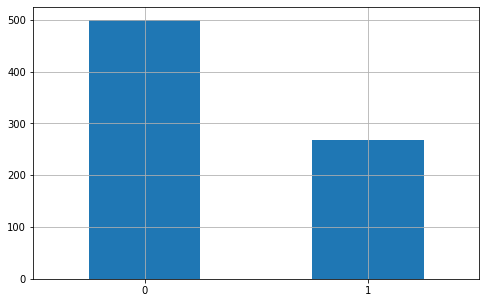

In [5]:
df['Outcome'].value_counts().plot.bar(rot=0, grid=True, figsize=(8,5))

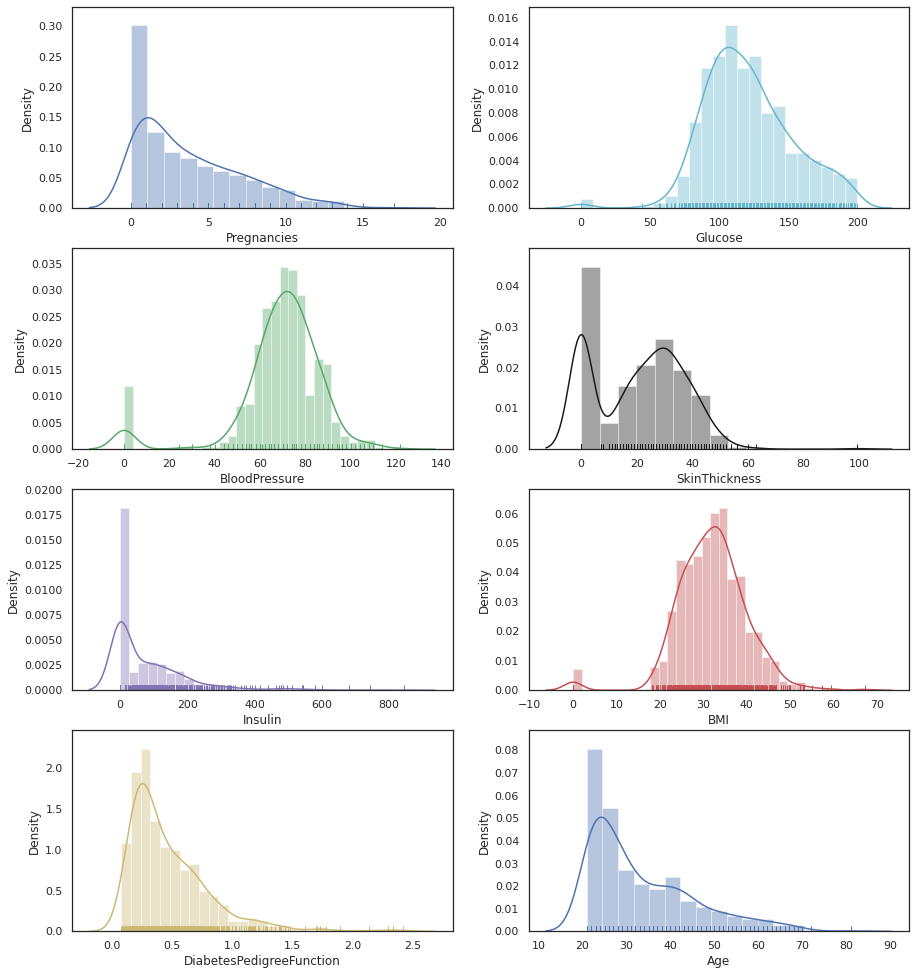

In [6]:
columns=list(df.columns[:-1])

#Graphs to be plotted with these colors
colours=['b','c','g','k','m','r','y','b']
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):
    plt.subplot(4,2,i+1)
    sns.distplot(df[columns[i]], hist=True, rug=True, color=colours[i])

## 1. Separe os dados em treino (80%) e teste (20%).

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X, y = df.drop(columns='Outcome', axis=1), df['Outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 2. Crie um modelo de árvore de decisão sobre o conjunto de treino e faça o que se pede:

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#### 1. Mostre a importância das features:

In [11]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [12]:
model.feature_importances_

array([0.        , 0.75587043, 0.        , 0.        , 0.        ,
       0.24412957, 0.        , 0.        ])

In [13]:
model_feature = pd.DataFrame(model.feature_importances_)
model_feature[ model_feature[0] > 0 ]

,0
1,0.75587
5,0.24413


In [14]:
idx = model_feature[ model_feature[0] > 0 ].index
X_train.columns[idx]

Index(['Glucose', 'BMI'], dtype='object')

In [15]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train.loc[:, X_train.columns[idx]], y_train)
y_pred = model.predict(X_test.loc[:, X_test.columns[idx]])

In [16]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy: {}\nF1: {}".format(accuracy, f1))

Accuracy: 0.6948051948051948
F1: 0.6538483161859785


#### 2. Desenhe a árvore de decisão:

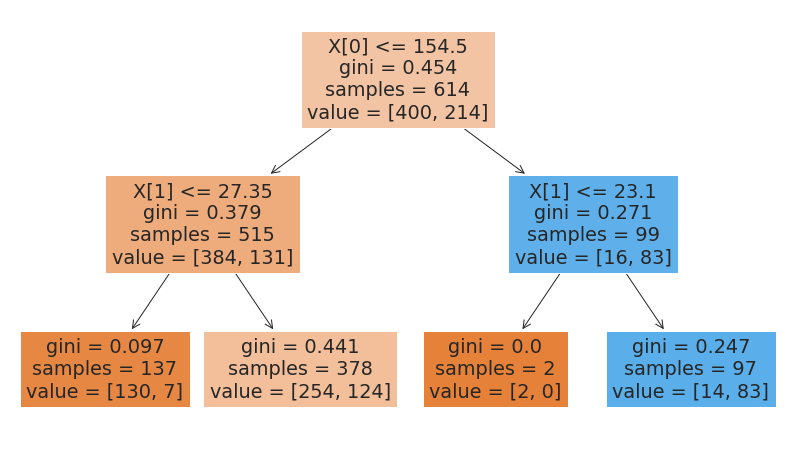

In [17]:
plt.figure(figsize=(14,8))
tree.plot_tree(model, filled=True);

#### 3. Calcule e mostre F1-Score sobre os dados de treino e sobre os dados de teste

In [18]:
y_pred = model.predict(X_train.loc[:, X_train.columns[idx]])
f1_score(y_train, y_pred, average='weighted')

0.7344875456253864

In [19]:
y_pred = model.predict(X_test.loc[:, X_test.columns[idx]])
f1_score(y_test, y_pred, average='weighted')

0.6538483161859785

## 3. Crie um modelo ensemble de Votação (MajorityVoteClassifier) sobre o conjunto de treino usando pelo menos 3 algoritmos de aprendizado de máquina. Compare o resultado de usar os modelos isoladamente com o resultado usando o MajorityVoteClassifier sobre o conjunto de teste usando a métrica F1-Score. Pode se basear no seguinte documento, mas não precisa usar k-Fold Cross Validation.
[documento](https://github.com/InsightLab/imersao-ciencia-de-dados/blob/master/2019/08-Modelos_de_Ensemble/Ensemble.ipynb)

In [20]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
clf1 = DecisionTreeClassifier(max_depth=2, random_state=42)

clf2 = RandomForestClassifier()

clf3 = KNeighborsClassifier()

In [22]:
mv_clf = VotingClassifier(estimators=[
        ('DecisionTreeClassifier', clf1), 
        ('RandomForestClassifier', clf2), 
        ('KNeighborsClassifier', clf3)
    ])

mv_clf.fit(X_train, y_train)
y_pred = mv_clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"f1: {f1}")

f1: 0.6808390409290633


## 4. Avalie agora as técnicas de Bagging (BaggingClassifier) usando árvores de decisão (DecisionTreeClassifier), RandomForest, AdaBoost e GradientBoosting sobre o conjunto de teste usando a métrica F1-Score. Mostre também a importância das features para cada uma das técnicas. Para usar o BaggingClassifier, você pode se basear no seguinte:
[documento](https://github.com/InsightLab/imersao-ciencia-de-dados/blob/master/2019/08-Modelos_de_Ensemble/Bagging.ipynb)

In [23]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [24]:
clf1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, random_state=42), n_estimators=10, random_state=10)

clf2 = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=10)

clf3 = BaggingClassifier(base_estimator=AdaBoostClassifier(random_state=42), n_estimators=10, random_state=10)

clf4 = BaggingClassifier(base_estimator=GradientBoostingClassifier(random_state=42), n_estimators=10, random_state=10)

In [25]:
for model in [clf1, clf2, clf3, clf4]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"f1: {f1};\nmodel: {model.base_estimator_}")

f1: 0.6931707748034278;
model: DecisionTreeClassifier(max_depth=2, random_state=42)
f1: 0.7305510023956626;
model: RandomForestClassifier()
f1: 0.7532467532467533;
model: AdaBoostClassifier(random_state=42)
f1: 0.7436948559373376;
model: GradientBoostingClassifier(random_state=42)
